## Question 1: ROC AUC feature importance

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv -O leads_coring.csv

--2025-10-23 20:26:35--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/course_lead_scoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 80876 (79K) [text/plain]
Saving to: 'leads_coring.csv'

     0K .......... .......... .......... .......... .......... 63%  531K 0s
    50K .......... .......... ........                        100% 2,96M=0,1s

2025-10-23 20:26:36 (762 KB/s) - 'leads_coring.csv' saved [80876/80876]



In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('leads_coring.csv')

In [7]:
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)
numeric_columns = list(df.dtypes[df.dtypes != 'object'].index)
df[categorical_columns]= df[categorical_columns].fillna('NA')
df[numeric_columns] = df[numeric_columns].fillna(0)

In [8]:
from sklearn.model_selection import train_test_split
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)
len(df_train), len(df_val), len(df_test)


(876, 293, 293)

In [9]:
y_train = df_train.converted.values
y_val = df_val.converted.values
y_test = df_test.converted.values

del df_train['converted']
del df_val['converted']
del df_test['converted']

In [ ]:
df_test.plot()

In [10]:
categorical_columns

['lead_source', 'industry', 'employment_status', 'location']

In [11]:
## removing the last target 'converted':
numeric_columns.pop()

'converted'

In [12]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical_columns + numeric_columns].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical_columns + numeric_columns].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [13]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_val)[:, 1]
CONVERTED_decision = (y_pred >= 0.5)
full_accuracy = round((y_val == CONVERTED_decision).mean(),4)
full_accuracy

np.float64(0.6997)

In [14]:
(y_val == CONVERTED_decision).sum()/len(y_val)

np.float64(0.6996587030716723)

In [15]:
from sklearn.metrics import accuracy_score


In [16]:
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

0.00 0.556
0.05 0.556
0.10 0.556
0.15 0.556
0.20 0.556
0.25 0.567
0.30 0.570
0.35 0.597
0.40 0.618
0.45 0.666
0.50 0.700
0.55 0.758
0.60 0.778
0.65 0.771
0.70 0.737
0.75 0.703
0.80 0.642
0.85 0.573
0.90 0.509
0.95 0.464
1.00 0.444


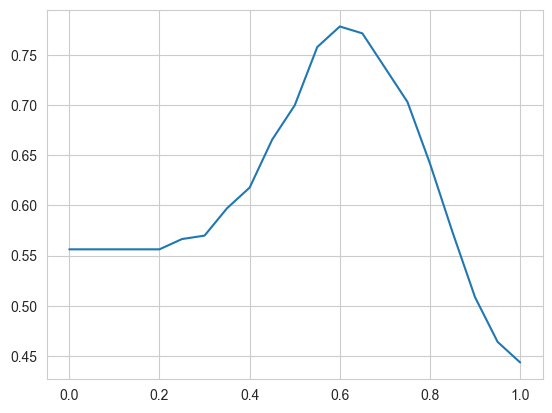

In [17]:
plt.plot(thresholds, scores)

In [47]:
from collections import Counter

In [48]:
Counter(y_pred >= 1.0)


Counter({np.False_: 293})

In [49]:
len(y_pred)

293

In [50]:
1 - y_val.mean()

np.float64(0.4436860068259386)